<a href="https://colab.research.google.com/github/MartinPdeS/FiberFusing/blob/master/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing FiberFusing and depedencies

In [ ]:
!python -m pip install FiberFusing --no-cache-dir  --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 141.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 177.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 MB 94.7 MB/s eta 0:00:00


## Importing the package

In [ ]:
from FiberFusing import Geometry, BackGround
from FiberFusing.fiber.catalogue import load_fiber
from FiberFusing.configuration.ring import FusedProfile_05x05
from PyOptik import MaterialBank

## Defining the different layer to add to the simulation.

In [ ]:
wavelength = 1.55e-6

# Set up the background medium (air)
air_background = BackGround(index=1.0)

# Create the cladding structure based on the fused fiber profile
cladding = FusedProfile_05x05(
    fiber_radius=62.5e-6,  # Radius of the fibers in the cladding (in meters)
    fusion_degree=0.1,  # Degree of fusion in the structure
    index=MaterialBank.fused_silica.compute_refractive_index(wavelength)  # Refractive index of silica at the specified wavelength
)

# Load fibers (e.g., SMF-28) positioned at the cores of the cladding structure
fibers = [
    load_fiber('SMF28', wavelength=wavelength, position=core_position)
    for core_position in cladding.cores
]

## Defining the geometry object

In [ ]:
# Set up the geometry with the defined background, cladding structure, and resolution
geometry = Geometry(
    background=air_background,
    additional_structure_list=[cladding],
    x_bounds='centering',
    y_bounds='centering',
    resolution=250
)

# Add the fibers to the geometry
geometry.add_fiber(*fibers)

## Ploting the patch an rasterized geometry

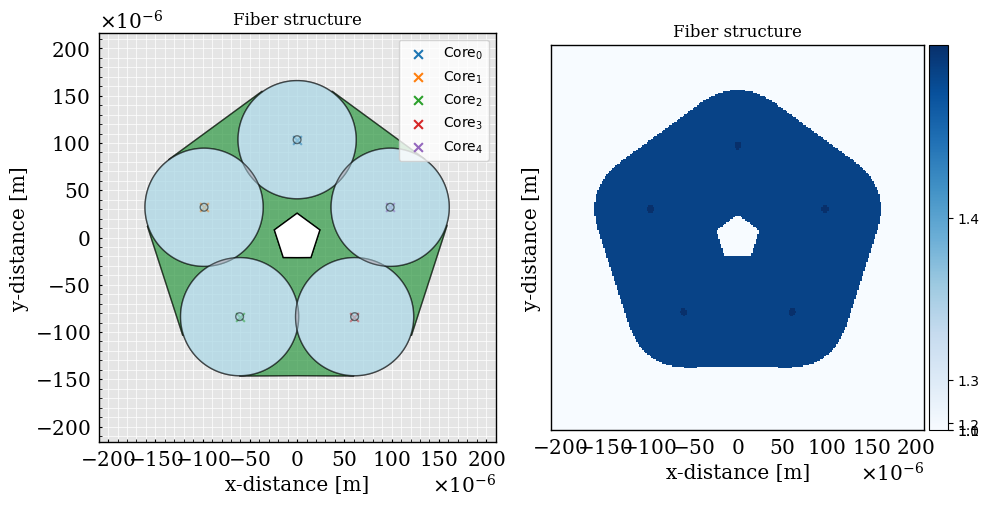

In [ ]:
geometry.plot(show_mesh=True)